In [ ]:
!pip install PyAudio-0.2.11-cp310-cp310-win_amd64.whl

ERROR: PyAudio-0.2.11-cp310-cp310-win_amd64.whl is not a supported wheel on this platform.


In [ ]:
!pip install SpeechRecognition
!pip install tensorflow==2.15.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 44.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 72.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing insta

In [ ]:
import speech_recognition as sr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

import nltk
import string
import warnings
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:


def main():
  r = sr.Recognizer()

  audio_path = "/content/test1.aiff"

  #for microphone
  # input = sr.Microphone()

  #for file
  input = sr.AudioFile(audio_path)

  print(input)

  with input as source:
    #for microphone
    # r.adjust_for_ambient_noise(source)
    # print("Listening.....")
    # audio = r.listen(source)



    #for file
    audio = r.record(source)

    print("Processing....")

    try:
      text = r.recognize_google(audio)
      print("Your input: " + text)
      return text
    except Exception as e:
      print("Error: " + str(e))


In [ ]:
if __name__ == "__main__":
    main()

Processing....
Your input: ladies and gentlemen I think my brain just committed suicide


In [ ]:

df = pd.read_csv('/content/labeled_data.csv')

In [ ]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


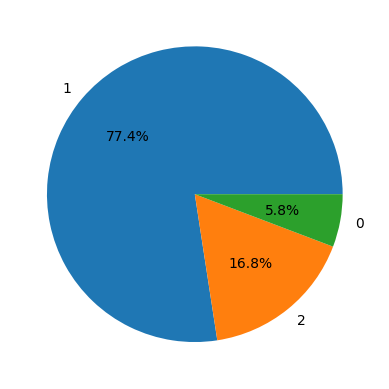

In [ ]:


values = df['class'].value_counts().values.tolist()
categories = df['class'].value_counts().index.tolist()

plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.show()


In [ ]:

df['tweet'] = df['tweet'].str.lower()
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['tweet']= df['tweet'].apply(lambda x: remove_punctuations(x))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely as a woman you shouldnt compl...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad for cuff...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life you eve...
3,3,3,0,2,1,1,rt cganderson vivabased she look like a tranny
4,4,6,0,6,0,1,rt shenikaroberts the shit you hear about me ...


In [ ]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	for word in str(text).split():

		if word not in stop_words:
			lemmatizer = WordNetLemmatizer()
			lemmatizer.lemmatize(word)

			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['tweet'] = df['tweet'].apply(lambda text: remove_stopwords(text))
df.head()


,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,rt mayasolovely woman shouldnt complain cleani...
1,1,3,0,3,0,1,rt mleew17 boy dats coldtyga dwn bad cuffin da...
2,2,3,0,3,0,1,rt urkindofbrand dawg rt 80sbaby4life ever fuc...
3,3,3,0,2,1,1,rt cganderson vivabased look like tranny
4,4,6,0,6,0,1,rt shenikaroberts shit hear might true might f...


In [ ]:
class_2 = df[df['class'] == 2]
class_1 = df[df['class'] == 1].sample(n=3500)
class_0 = df[df['class'] == 0]

sample_df = pd.concat([class_0, class_0, class_0, class_1, class_2], axis=0)


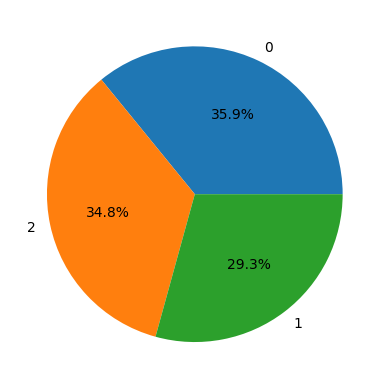

In [ ]:
values = sample_df['class'].value_counts().values.tolist()
categories = sample_df['class'].value_counts().index.tolist()

plt.pie(values, labels=categories, autopct='%1.1f%%')
plt.show()

In [ ]:


features = sample_df['tweet']
target = sample_df['class']

X_train, X_test, Y_train, Y_test = train_test_split(features,
												target,
												test_size=0.2,
												random_state=22)
X_train.shape, X_test.shape


((9562,), (2391,))

In [ ]:
from keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes=3)
Y_test = to_categorical(Y_test, num_classes=3)
Y_train.shape, Y_test.shape

((9562, 3), (2391, 3))

In [ ]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [ ]:
max_length = max(len(seq) for seq in X_train)

for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

In [ ]:

output_dim = 200

model = keras.models.Sequential([
    layers.Embedding(vocab_size, output_dim, input_length=max_length),
    layers.Bidirectional(layers.LSTM(16)),
    layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(3, activation="softmax"),
])

model.compile(loss='categorical_crossentropy',
			optimizer='adam',
			metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 200)           3940000   
                                                                 
 bidirectional (Bidirection  (None, 32)                27776     
 al)                                                             
                                                                 
 dense (Dense)               (None, 512)               16896     
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1

In [ ]:
es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)

In [ ]:
history = model.fit(
    X_train,
    Y_train,
    batch_size = 64,
    epochs=10,
    # validation_data=(X_test, Y_test),
    # callbacks = [lr, es]

)



Epoch 1/10
150/150 [==============================] - 21s 79ms/step - loss: 0.7554 - accuracy: 0.7826
Epoch 2/10
150/150 [==============================] - 11s 72ms/step - loss: 0.1575 - accuracy: 0.9585
Epoch 3/10
150/150 [==============================] - 12s 79ms/step - loss: 0.0570 - accuracy: 0.9881
Epoch 4/10
150/150 [==============================] - 12s 81ms/step - loss: 0.0376 - accuracy: 0.9924
Epoch 5/10
150/150 [==============================] - 12s 80ms/step - loss: 0.0271 - accuracy: 0.9951
Epoch 6/10
150/150 [==============================] - 12s 80ms/step - loss: 0.0178 - accuracy: 0.9979
Epoch 7/10
150/150 [==============================] - 13s 84ms/step - loss: 0.0168 - accuracy: 0.9968
Epoch 8/10
150/150 [==============================] - 12s 82ms/step - loss: 0.0198 - accuracy: 0.9958
Epoch 9/10
150/150 [==============================] - 12s 78ms/step - loss: 0.0259 - accuracy: 0.9937
Epoch 10/10
150/150 [==============================] - 11s 75ms/step - loss: 0.029

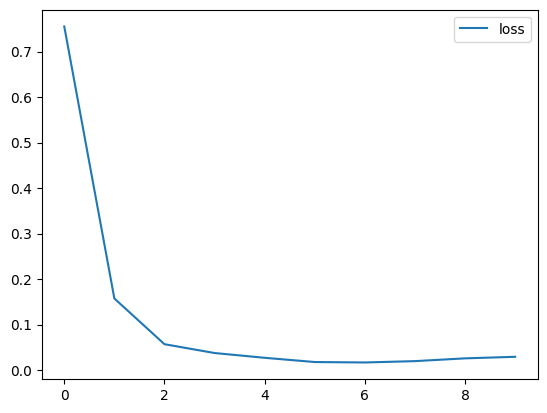

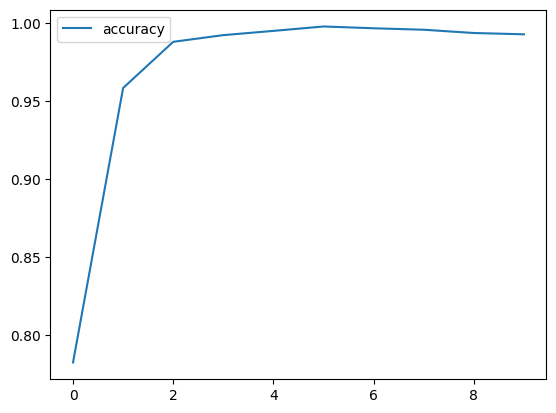

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot()
history_df.loc[:, ['accuracy']].plot()
plt.show()


In [ ]:
import numpy as np

y_pred_probabilities = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

y_true_labels = np.argmax(Y_test, axis=1)

accuracy = np.mean(y_pred_labels == y_true_labels)

print(f"Accuracy: {accuracy * 100:.2f}%")


75/75 [==============================] - 1s 5ms/step
Accuracy: 89.96%


In [ ]:
from keras.preprocessing.sequence import pad_sequences

input_text = "This is just a piece of shit"

input_sequence = tokenizer.texts_to_sequences([input_text])
input_sequence_padded = pad_sequences(input_sequence, maxlen=max_length, padding='post')

predicted_probabilities = model.predict(input_sequence_padded)
predicted_label = np.argmax(predicted_probabilities)

print(f"Predicted Class: {predicted_label}")


1/1 [==============================] - 0s 28ms/step
Predicted Class: 2
